In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from itertools import combinations 
from random import seed
from random import randint
import random
from sklearn.metrics import confusion_matrix

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_k(x,k):
    return 1 / (1 + k*np.exp(-z))

In [23]:
def relu(x):
    return np.log(1+np.exp(x))


In [24]:
def loss(out,Y):
        loss = (-1)*(np.sum(np.multiply(np.log(out), Y) + np.multiply((1 - Y), np.log(1 - out))))/(Y.shape[1])
        #print(loss)
        return loss
    
def loss1(out,Y):
        loss_1 = np.sum((out-Y)**2)
        #print(loss)
        return loss_1

In [25]:
df_proc = pd.read_csv("preprocessed.csv") 
df_proc.columns=[0,1,2,3,4,5,6,7,8,9,10,11]
#finding X(attributes excluding Target) and Y(Target)
Y = df_proc.filter([11], axis=1)
X = df_proc.drop([0,1,11],axis=1)
XTrain,XTest,YTrain,YTest=train_test_split(X, Y, test_size=0.25, random_state=42)

In [26]:
def ann(X,Y,learning_rate):
    #taking all 9 layers as input
    in_layer_no=X.shape[0] #no of attributes
    hid_layer_no=int((2/3)*in_layer_no)
    out_layer_no=1

    #initial weights
    wh = np.random.randn(hid_layer_no,in_layer_no) * 0.01
    bh = np.zeros(shape=(hid_layer_no, 1))
    w_out = np.random.randn(out_layer_no,hid_layer_no) * 0.01
    b_out = np.zeros(shape=(out_layer_no, 1))
    bh=0
    b_out=0
    initial_weights=[wh,bh,w_out,b_out]
    dwh_old=0
    dw_out_old=0
    for i in range(0,50000):
        #forward propogation
        #input to hidden layer = dot product(X,wh) + bh
        hid_layer_input = np.dot(wh,X) + bh
        hid_layer_act = sigmoid(hid_layer_input)
        
        # Final output layer prediction
        out_layer_input = np.dot(w_out,hid_layer_act) + b_out
        out_layer_act = sigmoid(out_layer_input)
        lo=loss1(out_layer_act,Y)
        if(i%1000==0):
            print(i,lo)
        '''dZ2 = out_layer_act - Y
        dW2 = (1 /X.shape[1]) * np.dot(dZ2, hid_layer_act.T)
        db2 = (1 / X.shape[1]) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(w_out.T, dZ2), 1 - np.power(hid_layer_act, 2))
        dW1 = (1 / X.shape[1]) * np.dot(dZ1, X.T)
        db1 = (1 / X.shape[1]) * np.sum(dZ1, axis=1, keepdims=True)
        
        wh = wh - learning_rate * dW1
        w_out = w_out - learning_rate * dW2
        bh = bh - learning_rate * db1
        b_out = b_out - learning_rate * db2
        '''
        #print("w_out",w_out.shape,"wh",wh.shape,"out act",out_layer_act.shape,"out before act",out_layer_input.shape,"hid act",hid_layer_act.shape,"hid before act",hid_layer_input.shape)
        #backward propogation output layer    
            #(tj-oj *oj* 1-oj)
        t_o = out_layer_act - Y
        sigmak = t_o * out_layer_act*(1-out_layer_act)  
            # sigmak* Xji
        loss_wout = (1/hid_layer_act.shape[1]) * np.dot(sigmak,hid_layer_act.T)
        loss_bout = (1/hid_layer_act.shape[1]) * np.dot(sigmak, np.ones([sigmak.shape[1],1])) 
          
        #backward propogation hidden layer
            # wkj*sigmak
        loss_hid_layer_act = np.dot(w_out.T,sigmak)
            # sigmaj= wkj*sigmak*oj*1-oj
        loss_hid_layer_input = loss_hid_layer_act * hid_layer_act*(1-hid_layer_act)   
            #  loss wh =  wkj*sigmak*oj*1-oj*Xij
        loss_wh = 1/X.shape[1] * np.dot(loss_hid_layer_input,X.T)
        loss_bh = 1/X.shape[1] * np.dot(loss_hid_layer_input, np.ones([loss_hid_layer_input.shape[1],1]))  
        
        wh = wh - learning_rate * loss_wh
        w_out = w_out - learning_rate * loss_wout
        bh = bh - learning_rate * loss_bh
        b_out = b_out - learning_rate * loss_bout
    return [wh,bh,w_out,b_out]
    ''' 
        #backpropogation
        dout_layer_act = (out_layer_act - Y) / (out_layer_act * (1 - out_layer_act))
        dZ2 = np.multiply(dout_layer_act, out_layer_act * (1 - out_layer_act))
        dw_out = np.dot(dZ2, hid_layer_act.T)
        #dw_out=dw_out+0.5*dw_out_old
        #dw_out_old=dw_out
        db_out = np.sum(dZ2, axis=1, keepdims=True)

        dhid_layer_act = np.dot(w_out.T, dZ2)
        dZ1 = np.multiply(dhid_layer_act, dhid_layer_act * (1 - dhid_layer_act))
        dwh = np.dot(dZ1, X.T)
        #dwh=dwh+0.2*dwh_old
        #dwh_old=dwh
        dbh = np.sum(dZ1, axis=1, keepdims=True)
        
        wh = wh - learning_rate * dwh
        w_out = w_out - learning_rate * dw_out
        bh = bh - learning_rate * dbh
        b_out = b_out - learning_rate * db_out
    '''
        
        

In [27]:
#final forward propogation to test trained model 
def predict(XTrain,YTrain,XTest,YTest,learning_rate):
    final_weights=ann(XTrain,YTrain,learning_rate)
    hid_layer_input = np.dot(final_weights[0],XTest) + final_weights[1]
    hid_layer_act = relu(hid_layer_input)
    out_layer_input = np.dot(final_weights[2],hid_layer_act) + final_weights[3]
    out_layer_act = sigmoid(out_layer_input)
    predictions = out_layer_act > 0.5
    predictions=predictions.astype(int)
    #print(type(predictions),predictions.shape)
    accuracy=float((np.dot(YTest,predictions.T) + np.dot(1-YTest,1-predictions.T))/float(YTest.size)*100)
    #print(accuracy)
    #print ('Accuracy: %f' % float((np.dot(YTest,predictions.T) + np.dot(1-YTest,1-predictions.T))/float(YTest.size)*100) + '%')
    return [accuracy,predictions]

In [28]:
def split_test_train(XTrain,XTest,YTrain,YTest):
    #print(X.shape,Y.shape)
    #X,Y=X.to_numpy(),Y.to_numpy()
    XTrain,XTest,YTrain,YTest= XTrain.to_numpy().T,XTest.to_numpy().T,YTrain.to_numpy().reshape(1, YTrain.shape[0]),YTest.to_numpy().reshape(1, YTest.shape[0])
    #X,Y=X.T,Y.reshape(1, Y.shape[0])
    #print(X.shape,Y.shape,XTrain.shape,YTrain.shape,XTest.shape,YTest.shape)
    res=predict(XTrain,YTrain,XTest,YTest,0.05)
    return res

In [42]:
def rSubset(arr,r): 
    return list(combinations(arr, r)) 
def comb(r):
    arr = [2,3,4,5,6,7,8,9,10] 
    return(rSubset(arr, r))
def att_bagg(r,XTrain,XTest,YTrain,YTest):
    s=comb(r)
    #print(s,len(s))
    length=len(s)
    inner_acc=[]
    #repeat 10 times
    for i in range(0,3):
        #9 random values
        if(r==9):
            res=split_test_train(XTrain,XTest,YTrain,YTest)
            ytemp_test=YTest.to_numpy().reshape(1, YTest.shape[0])
            return confusion_matrix(ytemp_test[0],res[1][0]),res[0]
        rand_index=random.sample(range(0, length), 5)
        #print(rand_index)
        l=[]
        for j in rand_index:
            t=s[j]
            #print(t,X,type(X))
            new_dataset_train = XTrain.loc[:,list(t)]
            new_dataset_test=XTest.loc[:,list(t)]
            #print(new_dataset)
            res=split_test_train(new_dataset_train,new_dataset_test,YTrain,YTest)
            l.append(res)
        #print(l)
        l.sort(key=lambda x:x[0],reverse=True)
        #print(l)
        top=l[0:3]
        top=list(map(lambda x: [x[0],x[1][0].tolist()],top))
        #print(top[0][1])
        votes=list(zip(top[0][1],top[1][1],top[2][1]))
        #print(final_pred)
        final_predictions=list(map(lambda x:max(set(list(x)), key = list(x).count),votes))
        temp=[]
        temp.append(final_predictions)
        final_predictions=np.asarray(temp)
        #print(type(final_predictions),final_predictions.shape)
        ytemp_test=YTest.to_numpy().reshape(1, YTest.shape[0])
        #final_predictions=final_predictions.astype(int)  
        accuracy=float((np.dot(ytemp_test,final_predictions.T) + np.dot(1-ytemp_test,1-final_predictions.T))/float(ytemp_test.size)*100)
        inner_acc.append([accuracy,final_predictions])
        #print(inner_acc)
        #print(final_predictions,len(final_predictions),len(YTest))
        #avg1=max(l) 
        #avg.append(avg1)
    ytemp_test=YTest.to_numpy().reshape(1, YTest.shape[0])
    inner_acc.sort(key=lambda x:x[0],reverse=True)
    #print(inner_acc)
    final_bag=inner_acc[1]
    return confusion_matrix(ytemp_test[0], final_bag[1][0]),final_bag[0]
#conf_mat,acc=att_bagg(5,XTrain,XTest,YTrain,YTest)


In [43]:
#acc=predict(XTrain,YTrain,XTest,YTest,0.05)
conf_mat,acc=att_bagg(9,XTrain,XTest,YTrain,YTest)

0 130.77681680215963
1000 117.55196314267097
2000 112.04940396723644
3000 96.97980711133718
4000 71.5912981833338
5000 49.113604399746926
6000 35.502544179180234
7000 27.917385323135083
8000 23.516293156046135
9000 20.786535917699986
10000 18.983017039531944
11000 17.725989158542795
12000 16.81036092883941
13000 16.11873645527956
14000 15.580314929174769
15000 15.150415553721544
16000 14.799718538380198
17000 14.508325881441419
18000 14.262334800977644
19000 14.051781955304284
20000 13.869366678243722
21000 13.70963337445878
22000 13.568433507970779
23000 13.442562873819236
24000 13.329511668580988
25000 13.227288878351505
26000 13.13429668362256
27000 13.049239182511444
28000 12.971055078644536
29000 12.898867374692921
30000 12.831945312422192
31000 12.769675252267616
32000 12.711538160471576
33000 12.657092036862114
34000 12.605958076617027
35000 12.557809682240686
36000 12.512363671359902
37000 12.46937319082694
38000 12.42862196744892
39000 12.38991961365618
40000 12.35309777166559

In [46]:
acc

96.57142857142857

In [ ]:
total=[]
for i in range(2,10):
    conf_mat,acc=att_bagg(i,XTrain,XTest,YTrain,YTest)
    total.append(acc)
    print(conf_mat)

0 131.22546256920913
1000 119.23726464005559
2000 118.8754460027811
3000 118.19040778869659
4000 116.79249243555395
5000 114.09214130721551
6000 109.40324645576723
7000 102.21960974218294
8000 92.5530772271531
9000 81.39739417342926
10000 70.56581574764056
11000 61.47538630005219
12000 54.482936218525964
13000 49.2862831211205
14000 45.43367008808818
15000 42.54052383439635
16000 40.32675226650324
17000 38.598420615381286
18000 37.22262206656866
19000 36.107656606189465
20000 35.189364180248624
21000 34.422093749243786
22000 33.772789916442385
23000 33.21710092874665
24000 32.73678738616529
25000 32.31797221238212
26000 31.949940716377085
27000 31.624305247204948
28000 31.33441500889112
29000 31.07493313197208
30000 30.84152947535143
31000 30.630654598037474
32000 30.439371401359107
33000 30.2652282525871
34000 30.106162297159504
35000 29.960424988319
36000 29.82652414390103
37000 29.70317842446005
38000 29.589281239629198
39000 29.48387187916397
40000 29.38611223093242
41000 29.295267

40000 25.39345256439044
41000 25.35627978398764
42000 25.322280608761364
43000 25.291123569057433
44000 25.262518389676835
45000 25.236210033837242
46000 25.211973728382475
47000 25.189610789315367
48000 25.16894510350772
49000 25.1498201510785
0 131.05256948109533
1000 119.27956487296962
2000 118.9974194252249
3000 118.51568246996142
4000 117.59270055189462
5000 115.8527499025119
6000 112.77903289940099
7000 107.84080939499364
8000 100.73056311924235
9000 91.69675152114146
10000 81.81759557449811
11000 72.57016564471527
12000 64.90284305734019
13000 58.96390879501224
14000 54.47235018043406
15000 51.066638815943605
16000 48.44419869604278
17000 46.383685663686336
18000 44.730638330009455
19000 43.37845278761782
20000 42.2531153616539
21000 41.302488923075366
22000 40.48915186257673
23000 39.7856886028303
24000 39.17159508564395
25000 38.63123005810956
26000 38.152441471389444
27000 37.72563079320511
28000 37.34310418773092
29000 36.998614131642434
30000 36.687029441627516
31000 36.404

32000 47.08852238828673
33000 46.86577324738195
34000 46.665617543091706
35000 46.485278269768315
36000 46.32238703930747
37000 46.17491326867997
38000 46.04110751744672
39000 45.919455789300066
40000 45.808642402518586
41000 45.7075196126149
42000 45.61508259726094
43000 45.53044873126852
44000 45.45284031788642
45000 45.38157012316597
46000 45.31602919783657
47000 45.25567657697125
48000 45.200030529680845
49000 45.14866109499002
0 131.11349682147903
1000 119.23557779290375
2000 118.87066738995657
3000 118.18602881344029
4000 116.79372405392435
5000 114.08970937756496
6000 109.33517685344182
7000 101.99653930497259
8000 92.24882824070886
9000 81.39616074788103
10000 71.34787288123466
11000 63.29391843567831
12000 57.32950018534167
13000 53.02408413863753
14000 49.89986971615447
15000 47.589038881186355
16000 45.83895994713324
17000 44.48173602675165
18000 43.40576216423385
19000 42.53577951751602
20000 41.820012410970335
21000 41.22206075434711
22000 40.71578126377275
23000 40.282014

20000 25.597585392141156
21000 25.09861443817407
22000 24.675894707690848
23000 24.3143518279716
24000 24.002511047700963
25000 23.731504544799026
26000 23.494385341875628
27000 23.28564407652643
28000 23.100862711038488
29000 22.936462420385322
30000 22.789517370244596
31000 22.65761532747007
32000 22.538752045490675
33000 22.431250337026746
34000 22.333697417043503
35000 22.24489592322479
36000 22.16382528559567
37000 22.08961100497091
38000 22.021500031500647
39000 21.95884088906217
40000 21.901067521870907
41000 21.847686082686053
42000 21.79826406231359
43000 21.75242129514411
44000 21.709822477445893
45000 21.670170912777195
46000 21.63320325844446
47000 21.59868509295556
48000 21.56640716022021
49000 21.53618217428245
0 131.0622465372312
1000 118.91035741615532
2000 117.88172434341183
3000 115.59463942313386
4000 110.64391083796495
5000 101.4651782134548
6000 87.97547091422047
7000 72.69143337225617
8000 59.105018630862716
9000 48.9367879682349
10000 41.892139827665325
11000 37.

10000 39.022032170522635
11000 34.36724936520271
12000 31.15469983730138
13000 28.864040408307595
14000 27.176085589189206
15000 25.89441642560922
16000 24.89532244020286
17000 24.098575173438107
18000 23.4505765284529
19000 22.914501835323225
20000 22.464393882845926
21000 22.08152770791614
22000 21.752112153127104
23000 21.46579897263161
24000 21.214692433223668
25000 20.992676778517826
26000 20.79495023986806
27000 20.617696141975053
28000 20.45784680809532
29000 20.312911428901664
30000 20.180848761518554
31000 20.059971736504107
32000 19.94887510105694
33000 19.846379914139632
34000 19.751490521168712
35000 19.663360876087644
36000 19.581267939428244
37000 19.50459048630398
38000 19.432792089218744
39000 19.36540735089585
40000 19.302030688207772
41000 19.242307134357112
42000 19.18592474971566
43000 19.132608324018186
44000 19.0821141222835
45000 19.03422547984696
46000 18.988749092512272
47000 18.945511879173736
48000 18.904358318595577
49000 18.86514818104458
0 131.106248259444

46000 17.791826134483454
47000 17.770434379951993
48000 17.7502743497769
49000 17.73125150777247
0 130.7074043081384
1000 118.98273141801899
2000 118.03148814492728
3000 115.96248653045481
4000 111.48409258595834
5000 103.060355520448
6000 90.31873007174823
7000 75.20574695946942
8000 61.02956600084753
9000 49.98709148365079
10000 42.20658192580392
11000 36.865124865898494
12000 33.147335583273204
13000 30.486077759663992
14000 28.522699551663603
15000 27.033197906609175
16000 25.875203822549643
17000 24.955736801615004
18000 24.21228896458434
19000 23.601663332616564
20000 23.093246828182398
21000 22.66484861864847
22000 22.300055473454663
23000 21.986507344903586
24000 21.714745737073933
25000 21.477427531496595
26000 21.268777443525174
27000 21.084199663904226
28000 20.919997796524306
29000 20.773169811765165
30000 20.641255828633884
31000 20.52222367025389
32000 20.414381807967324
33000 20.316312421960788
34000 20.226819414323572
35000 20.144887659564105
36000 20.06965078772768
370

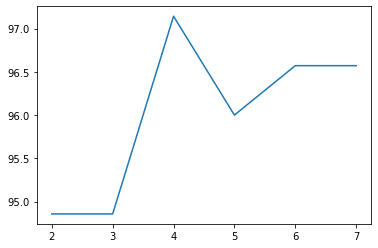

In [37]:
keys=[2,3,4,5,6,7,8,9]
dictionary = dict(zip(keys, total))
plt.plot(*zip(*sorted(dictionary .items())))
plt.show()

In [38]:
total

[94.85714285714286,
 94.85714285714286,
 97.14285714285714,
 96.0,
 96.57142857142857,
 96.57142857142857]